In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import tensorflow_text as tf_text

In [2]:
print("TF Version:", tf.__version__)
print("TF Datasets Version:", tfds.__version__)
print("TF Text Version:", tf_text.__version__)

TF Version: 2.19.0
TF Datasets Version: 4.9.9
TF Text Version: 2.19.0


In [3]:
# !curl https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt > $HOME/.keras/datasets/shakespeare.txt
# !curl https://storage.googleapis.com/download.tensorflow.org/data/illiad/cowper.txt > $HOME/.keras/datasets/cowper.txt
# !curl https://storage.googleapis.com/download.tensorflow.org/data/illiad/derby.txt > $HOME/.keras/datasets/derby.txt
# !curl https://storage.googleapis.com/download.tensorflow.org/data/illiad/butler.txt > $HOME/.keras/datasets/butler.txt

In [4]:
FILE_NAMES = ['cowper.txt', 'derby.txt', 'butler.txt', 'shakespeare.txt']

In [5]:
parent_dir = os.path.join(os.path.expanduser('~'), ".keras", "datasets")
parent_dir

'/Users/masoudkord/.keras/datasets'

In [6]:
def labeler(example, index):
    return example, tf.cast(index, tf.int64)

labeled_data = []

for i, filename in enumerate(FILE_NAMES):
    # tf.data.TextLineDataset; Creates a Dataset comprising lines from one or more text files.
    lines_dataset = tf.data.TextLineDataset(os.path.join(parent_dir, filename))
    labeled_dataset = lines_dataset.map(lambda ex: labeler(ex, i))
    labeled_data.append(labeled_dataset)

print(len(labeled_data))
# help(tf.data.TextLineDataset.map)

4


In [7]:
BUFFER_SIZE = 50000
BATCH_SIZE = 64
TAKE_SIZE = 5000

In [8]:
all_labeled_data = labeled_data[0]
for labeled_dataset in labeled_data[1:]:
    all_labeled_data = all_labeled_data.concatenate(labeled_dataset)

all_labeled_data = all_labeled_data.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [9]:
print(all_labeled_data.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [10]:
# Check if it can find the files
for filename in FILE_NAMES:
    path = os.path.join(parent_dir, filename)
    if not os.path.exists(path):
        print(f"Didn't find the file {filename}")
# Replaced $HOME with ~ and then replaced ~ with os.path.expanduser(`~`) and now it works
print(os.path.expanduser('~'))

/Users/masoudkord


In [11]:
for ex in all_labeled_data.take(15):
    print(ex)

(<tf.Tensor: shape=(), dtype=string, numpy=b'in their companies and at daybreak Idaeus went his way to the ships. He'>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'Are ever such. More terrible are mine,'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'Menoetius after he had done the Trojans much evil. Therefore I am'>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'For when Patroclus fell, the friend was slain'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b"A thicket his affrighted steeds detain'd">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'He to his faithful follower and friend,'>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'do, I shall leave you to your fate and hate you as much as I have loved'>, <tf.Tensor: shape=

2025-07-09 16:05:49.995826: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
# Can't use simple Tokenizer need to specify it
# tokenizer = tf_text.WhitespaceTokenizer()
tokenizer = tfds.deprecated.text.Tokenizer()

vocabulary_set = set()
for text_tensor, _ in all_labeled_data:
    text = text_tensor.numpy().decode('utf-8')
    # print(text)
    some_tokens = tokenizer.tokenize(text)
    vocabulary_set.update(some_tokens)
    # print(vocabulary_set)
    # for token in some_tokens:
    #     vocabulary_set.update(token)
    #     break

2025-07-09 16:05:54.003626: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
print(len(vocabulary_set))
print(vocabulary_set)

23574
{'Alcander', 'supply', 'neglected', 'burn', 'releasing', 'chastize', 'woe', 'Soothing', 'swan', 'Vienna', 'Eëriboea', 'Provide', 'glassy', 'nutmegs', 'cancell', 'dash', 'kindness', 'Amatheia', 'nice', 'Phyleus', 'zeal', 'Steed', 'Torn', 'Specially', 'overhead', 'blaze', 'lack', 'anchors', 'magistrate', 'lookers', 'worshipped', 'days', 'gnats', 'surfeiting', 'disabl', 'outposts', 'cowed', 'disappear', 'Pleads', 'flatulent', 'appendix', 'talons', 'Wonder', 'Demouchus', 'conjurations', 'allotting', 'Styx', 'spill', 'whelk', 'Watchful', 'innocency', 'hospitable', 'Protesilaus', 'fold', 'dusty', 'saved', 'Revenged', 'morsel', 'poppy', 'whisper', 'use', 'laudis', 'Forced', 'adjusting', 'Adamas', 'temples', 'terrors', 'touching', 'Near', 'unaided', 'Penker', 'rival', 'heldest', 'sevenfold', 'matrimonial', 'taunted', 'strawberries', 'tart', 'gilt', 'become', 'advance', 'hunt', 'Suppose', 'scourging', 'Taken', 'Aepytus', 'Heating', 'parched', 'Chimaera', 'Dear', 'elvish', 'remonstrance', 

In [14]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [15]:
example_text = next(iter(all_labeled_data))[0].numpy()
print(example_text)

b'in their companies and at daybreak Idaeus went his way to the ships. He'


In [16]:
# help(next)
# help(iter)

In [17]:
encoded_example = encoder.encode(example_text)
print(encoded_example)

[21343, 9970, 18836, 435, 15408, 5301, 6523, 2755, 7818, 9359, 12163, 10442, 3422, 21158]


In [18]:
def encode(text_tensor, label):
    encoded_text = encoder.encode(text_tensor.numpy())
    return encoded_text, label

def encode_map_fn(text, label):
    return tf.py_function(encode, inp=[text, label], Tout=(tf.int64, tf.int64))

all_encoded_data = all_labeled_data.map(encode_map_fn)

In [19]:
train_data = all_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, padded_shapes=([-1],[]))

test_data = all_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE, padded_shapes=([-1],[]))

In [20]:
sample_text, sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(17,), dtype=int64, numpy=
 array([21343,  9970, 18836,   435, 15408,  5301,  6523,  2755,  7818,
         9359, 12163, 10442,  3422, 21158,     0,     0,     0])>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>)

In [21]:
vocab_size = len(vocabulary_set)

In [22]:
vocab_size += 1

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 64))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
for units in [64, 64]:
    model.add(tf.keras.layers.Dense(units, activation='relu'))

# Output layer. The first argument is the number of labels.
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
%%time
history = model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
   1320/Unknown 19s 11ms/step - accuracy: 0.7035 - loss: 0.6591

/opt/anaconda3/envs/ai/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1322/1322 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7037 - loss: 0.6588 - val_accuracy: 0.7784 - val_loss: 0.5122
Epoch 2/5


2025-07-09 16:06:14.847620: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1322/1322 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8833 - loss: 0.2919 - val_accuracy: 0.7790 - val_loss: 0.5270
Epoch 3/5
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9209 - loss: 0.2007 - val_accuracy: 0.7960 - val_loss: 0.5252
Epoch 4/5


2025-07-09 16:06:50.839005: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1322/1322 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9403 - loss: 0.1514 - val_accuracy: 0.7924 - val_loss: 0.6088
Epoch 5/5
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9530 - loss: 0.1182 - val_accuracy: 0.7976 - val_loss: 0.6496
CPU times: user 2min 39s, sys: 38.9 s, total: 3min 18s
Wall time: 1min 33s


In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

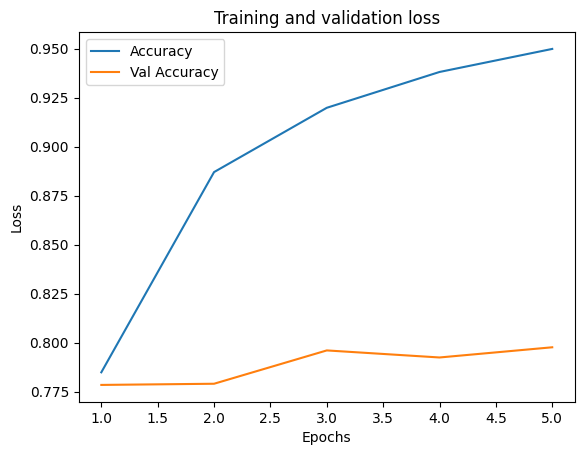

In [30]:
# epochs = range(1, 21)
epochs = range(1, 6)

plt.plot(epochs, history_dict['accuracy'], label="Accuracy")
plt.plot(epochs, history_dict['val_accuracy'], label="Val Accuracy")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

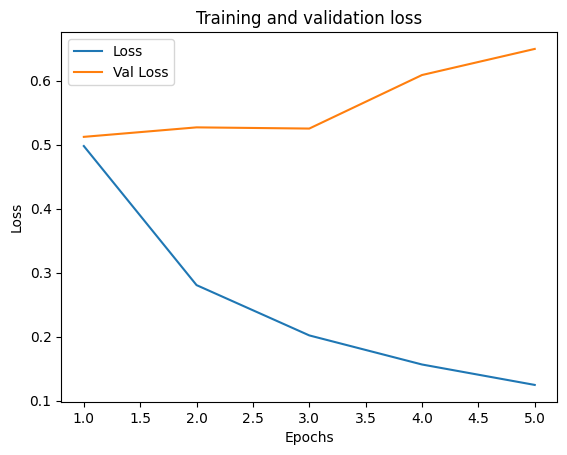

In [31]:
plt.plot(epochs, history_dict['loss'], label="Loss")
plt.plot(epochs, history_dict['val_loss'], label="Val Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# %%time
# It will use the previous weights and will not initialize new weights
# history = model.fit(train_data, epochs=4, validation_data=test_data)

In [ ]:
# history_dict = history.history

In [ ]:
# epochs = range(1, 5)

# plt.plot(epochs, history_dict['accuracy'], label="Accuracy")
# plt.plot(epochs, history_dict['val_accuracy'], label="Val Accuracy")
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# plt.plot(epochs, history_dict['loss'], label="Loss")
# plt.plot(epochs, history_dict['val_loss'], label="Val Loss")
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

In [32]:
eval_loss, eval_acc = model.evaluate(test_data)
print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7937 - loss: 0.6610

Eval loss: 0.650, Eval accuracy: 0.798


In [33]:
example_text = b'Do not omit the heavy offer of it'
example_text = b'to be or not to be'
encoded_example = encoder.encode(example_text)
print(encoded_example)
input_tensor = tf.convert_to_tensor([encoded_example])

[12163, 19418, 2680, 1742, 12163, 19418]


In [34]:
result = model.predict(input_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [35]:
result

array([[0.03672454, 0.2466148 , 0.13683699, 0.5798237 ]], dtype=float32)

In [36]:
result_dict = {'cowper':0, 'derby':0, 'butler':0, 'shakespeare':0}
count = 0
for i in result_dict.keys():
    result_dict[i] = float(result[0][count])
    count += 1
    if count > 3:
        count = 0
        break

In [37]:
print(result_dict)

{'cowper': 0.03672454133629799, 'derby': 0.24661479890346527, 'butler': 0.13683699071407318, 'shakespeare': 0.5798236727714539}


In [38]:
import numpy as np

Text(0, 0.5, 'Probability')

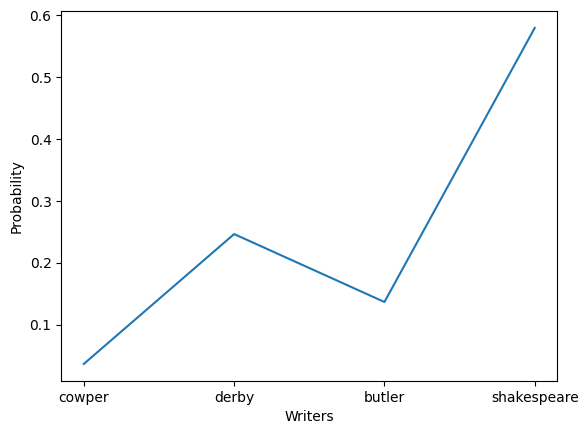

In [39]:

x = np.array([0, 1, 2, 3])
x_ticks = ["cowper", "derby", "butler", "shakespeare"]
plt.xticks(x, x_ticks)
plt.plot(x, result[0])
plt.xlabel("Writers")
plt.ylabel("Probability")